![example](images/director_shot.jpeg)

# PROJECT TITLE: MICROSOFT MOVIE PROJECT 
## Author: Nelson Kibet kemboi 

## Overview 
In the recent past, there has been increased production of movies in America which has drawn attention to Microsot company. Hence the company has decided to produce thier own movies. Since microsoft company has no idea about movie recording and production, this report will seek to analyse data sets pertaining to movie studio creation and give insights as to why the company should utilize this available venture. In this case we will use exploratory data analysis to pitch recommendations to their stakeholders. 

## Business Problem

In order to invest in this new venture there are factors to be considered. This is important since microsft should not invest in an unworthy project vis a vis their main mandate. This project will find the followig issues hence helping Microsoft map their investment proposal: 
    
***
Questions to consider:
* Finding the best perfoming movies studios. 
* Comparing the cost of production in relation to the revenue earned.
* comparison between various based on ratings and people preference. 
* The microsoft competitors so as to see what best their do
***

## Data Understanding
In this project we will use IDMB database where there are several tables realting to production of movies. We will also check other two csv dataset to obtain the ratings, production cost and gross revenue both in domestic and foreign levels. The data is from 2010 about movies. 

## Data cleaning process

In [7]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import zipfile
import seaborn as sns
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

In [3]:
# Here we run the code to unzip and explore the data
with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')
    
# Created a new file called im.db
# Added the file to .gitignore because it's too big to upload to GitHub

### Loading bom.movie_gross.csv

In [4]:
# Creating a connection to the Database
conn = sqlite3.connect('zippedData/im.db')

In [5]:
#connecting to the SQL tables 
pd.read_sql("""
SELECT *
FROM sqlite_schema
WHERE type='table'
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [9]:
# reading first database
movie_ratings= pd.read_sql("""
SELECT *
FROM movie_ratings;
""", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
#Checking for missing values
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [ ]:
#checking for dupliacted data 
movie_ratings.duplicated().value_counts()

False    73856
dtype: int64

The table on movie ratings has no dulicates nor missing values

In [ ]:
# reading second databe
movie_basic= pd.read_sql("""
SELECT *
FROM movie_basics;
""", conn)
df2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#checking the percentages of missing values in the movie_basic table
movie_basic.isna().sum()/len(movie_basic)*100

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

In [ ]:
#droping mising values rows for original_title and genres column

movie_basic.dropna(subset = ['original_title', 'genres'], axis =0, inplace = True)
movie_basic.isna().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

In [ ]:
#filling missing values in runtime_minutes column
movie_basic['runtime_minutes'].fillna(method='pad', inplace=True, axis=0)
movie_basic.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

Now our dataset is clean, we can go on and join both of them 

##### joining the two tables (movie_basics and movie_ratings)

In [ ]:
#writing the code to join the two tables 
ratings_and_basics = pd.read_sql("""
SELECT primary_title, start_year, genres, averagerating, numvotes
FROM movie_basics AS MB
JOIN movie_ratings AS MR
    ON MB.movie_id = mr.movie_id 
    WHERE numvotes> 500000 AND averagerating BETWEEN 6.0 AND 9.5
    ORDER BY averagerating DESC
    LIMIT 50;
""", conn)
df3.head()

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
2,The Intouchables,2011,"Biography,Comedy,Drama",8.5,677343
3,Whiplash,2014,"Drama,Music",8.5,616916
4,Avengers: Infinity War,2018,"Action,Adventure,Sci-Fi",8.5,670926


In [ ]:
#Identifying the mean of the sorted tables and remove the outlier that is too much spread outside data range 
genres_sorted_mean = pd.DataFrame(ratings_and_basics.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).iloc[:10]
genres_sorted_mean

,numvotes
genres,
"Action,Thriller",1.387769e+06
"Drama,Western",1.211405e+06
"Biography,Crime,Drama",1.035358e+06
"Mystery,Thriller",1.005960e+06
"Adventure,Drama,Sci-Fi",9.897250e+05
"Action,Adventure,Sci-Fi",8.046928e+05
"Action,Adventure,Comedy",7.712503e+05
"Drama,Mystery,Thriller",7.615920e+05
"Adventure,Family,Fantasy",7.196290e+05


#### Joining more tables 

In [ ]:
#iterating over the movie_basics table and joining with directors and movie_ratings tables
directors_rating = pd.read_sql("""
      SELECT movie_basics.primary_title, averagerating, primary_name
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id;     
              """, conn)
directors_rating

,primary_title,averagerating,primary_name
0,Life's a Beach,3.9,Tony Vitale
1,Steve Phoenix: The Untold Story,5.5,Bill Haley
2,The Babymakers,5.0,Jay Chandrasekhar
3,The Babymakers,5.0,Jay Chandrasekhar
4,Bulletface,5.8,Albert Pyun
...,...,...,...
181382,Reversing Roe,7.4,Anne Sundberg
181383,The Princess Switch,6.0,Mike Rohl
181384,The Princess Switch,6.0,Mike Rohl
181385,Doozy,6.7,Richard Squires


In [ ]:
#joining tables for directors, movie_basics, movie_ratings and persons tables to obtain directors information
directors_info =pd.read_sql(
    """SELECT DISTINCT primary_name, original_title, averagerating
	FROM persons pr
	JOIN directors dr 
		ON pr.person_id = dr.person_id
	JOIN movie_basics mb 
		ON dr.movie_id = mb.movie_id 
	JOIN movie_ratings mr 
		ON mb.movie_id = mr.movie_id""", conn)
directors_info

,primary_name,original_title,averagerating
0,Ruel S. Bayani,Paano na kaya,6.4
1,Ruel S. Bayani,No Other Woman,6.4
2,Ruel S. Bayani,One More Try,5.8
3,Ruel S. Bayani,Kasal,7.9
4,Bryan Beasley,Not Such a Bad Guy: Conversations with Dabney ...,8.9
...,...,...,...
85943,Benjamin Ovesen,Gina,7.4
85944,Frank W Chen,Late Life: The Chien-Ming Wang Story,5.8
85945,Prasobh Vijayan,Lilli,5.7
85946,Grzegorz Jankowski,Polskie gówno,5.2


In [ ]:
#joining tables for directors, movie_basics, movie_ratings and persons tables
joining_tables = pd.read_sql('''SELECT primary_name, COUNT(primary_name), averagerating
FROM persons AS p
JOIN directors AS d ON p.person_id = d.person_id
JOIN movie_basics AS mb ON mb.movie_id = d.movie_id
JOIN movie_ratings AS mr ON mr.movie_id = mb.movie_id
GROUP BY primary_name, averagerating
HAVING AVG(averagerating) > 9 AND COUNT(primary_name) > 5
ORDER BY averagerating DESC;
''', conn)
director_rated

,primary_name,COUNT(primary_name),averagerating
0,Damir Radic,7,9.2
1,Fan Li,6,9.2
2,Georges Chamchoum,6,9.2
3,Nuo Wang,6,9.2
4,Yihui Ye,6,9.2
5,Chi-jan Hou,6,9.1
6,Chun-Yi Hsieh,6,9.1
7,Corey Lubowich,12,9.1
8,Li Cho,6,9.1


In [12]:
#joining tables for directors, movie_basics, movie_ratings and persons tables
#Arranging the ratings in descending order to find the most rated to list rated 
directors_ratings_and_names = pd.read_sql("""
      SELECT DISTINCT primary_name, COUNT(primary_name), AVG(averagerating)
      FROM directors
      JOIN persons ON directors.person_id = persons.person_id
      JOIN movie_basics ON movie_basics.movie_id = directors.movie_id
      JOIN movie_ratings ON movie_ratings.movie_id = movie_basics.movie_id
      GROUP BY primary_name
      HAVING AVG(averagerating) > 7.5 AND COUNT(primary_name) > 15
      ORDER BY AVG(averagerating) DESC
      LIMIT 10;     
              """,conn)
directors_ratings_and_names

,primary_name,COUNT(primary_name),AVG(averagerating)
0,Sylvia Broeckx,28,9.000000
1,Lisa Gossels,17,9.000000
2,Erin Korbylo,28,9.000000
3,Dennis Korbylo,28,9.000000
4,Anthony Russo,30,8.246667
5,Joe Russo,31,8.180645
6,Pauli Janhunen Calderón,23,8.152174
7,Jaco Van Dormael,16,8.106250
8,S.S. Rajamouli,22,7.986364
9,Sukumar,25,7.968000


From data combined from two tables i was able to find the most top genres 
when combining the two data sets into one data frame, i filtered the highest rated and most voted movies to come up with a combined data frame ratings_and_basics.
From this data frame there are no duplicates or null values.
From ratings_and_basics dataset I was able to find the top 10 most popular genres with Action,Adventure,Sci-Fi being the leading. Besides i joined other tables to obtain directors ratings versuses the movies they have produced. 

### Loading bom.movie_gross.csv

In [ ]:
#loading the movie_gross dataset and checking the data overview 
gross_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
#identifying missing values on the dataset and converting them to percentages based on null values
gross_df.isna().sum()/len(gross_df)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

It can be seen that movie_gross dataset has some missing values the highest being foreign_gross column with 39% of missing values. The other two are domestic_gross and studio which have lesser missing values. It is recommendable to drop all of foreign_gross column and fill the other null values or drop only rows with null values

In [ ]:
#checking for duplicates in the data
gross_df.duplicated().sum()

0

From the results above there are no duplicated values in the dataset

In [ ]:
#The code below is used to check for null values in the dataset and converting it to dataframe to check in tabular form 
gross_df[gross_df.isna()]

,title,studio,domestic_gross,foreign_gross,year
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
3382,NaN,NaN,NaN,NaN,NaN
3383,NaN,NaN,NaN,NaN,NaN
3384,NaN,NaN,NaN,NaN,NaN
3385,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Writing a code that drops the null values in studio rows and leaving other columns with values
gross_df = gross_df[gross_df['studio'].notna()]
gross_df.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [ ]:
#droping the rows with null values in domestic_gross column
gross_df.dropna(subset = ['domestic_gross'], axis =0, inplace = True)

In [ ]:
#dropping the whole of foreign_gross column 
gross_df.drop('foreign_gross', axis=1, inplace= True )

In [ ]:
#checking if there is still any missing value in the dataset
gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [ ]:
#Importing datatime module 
from datetime import datetime
#converting the datatime from object to datetime format
gross_df['year']  = pd.to_datetime(gross_df['year'])
gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3356 non-null   object        
 1   studio          3356 non-null   object        
 2   domestic_gross  3356 non-null   float64       
 3   year            3356 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 131.1+ KB


Now our movie_gross dataset is clean


#### DATA CLEANING OF TN.MOVIE_BUDJECT.CSV

In [ ]:
#reading the movie_budget dataframe and checking its first five rows
movie_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', index_col=0)
movie_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
#checking for nullvalues in the dataset
movie_df.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [ ]:
#defining a function to strip '$' from the dataset in order to convert them from object to integers
def remove_symbols(dataframe):
    movie_df[dataframe] = movie_df[dataframe].apply(lambda x : float(x.replace('$', "").replace(",", "")))
    return movie_df[dataframe]

In [ ]:
#removing the dolar sign using the predefined function above
remove_symbols('production_budget')
remove_symbols('domestic_gross')
remove_symbols('worldwide_gross')


id
1     2.776345e+09
2     1.045664e+09
3     1.497624e+08
4     1.403014e+09
5     1.316722e+09
          ...     
78    0.000000e+00
79    2.404950e+05
80    1.338000e+03
81    0.000000e+00
82    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [ ]:
#confirming the striped '$' from dataframe
movie_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [ ]:
#checking if all columns with intergers are in proper Dtype
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   movie              5782 non-null   object 
 2   production_budget  5782 non-null   float64
 3   domestic_gross     5782 non-null   float64
 4   worldwide_gross    5782 non-null   float64
dtypes: float64(3), object(2)
memory usage: 271.0+ KB


In [ ]:
#Confirming that there are no duplicates in the dataset
movie_df.duplicated().value_counts()

False    5782
dtype: int64

In [ ]:
#droping released_date column since its not neccesary in our analysis
movie_df.drop(['release_date'], axis=1)

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


Our data is now clean as there are no missing values and duplicated and all Dtype of objects converted to integers as it should be 

In [ ]:
#Determing the return on investemnt from the dataset
#This will help in determining the returns made by movies produced
movie_df['ROI'] = ((movie_df['domestic_gross'] + movie_df['worldwide_gross'] - movie_df['production_budget']) / movie_df['production_budget']).round(2)

In [ ]:
#Limiting our data so as to plot it easily and make recommendations 
movie_df_sorted= movie_df.sort_values(by = 'ROI', ascending=False).head(10).iloc[1:10]
movie_df_sorted

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,,
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,670.34
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,647.07
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,643.21
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,582.26
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,541.50
10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,518.43
47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,431.16
16,"Aug 9, 1995",The Brothers McMullen,50000.0,10426506.0,10426506.0,416.06
66,"Oct 18, 1974",The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,378.61


## Data Analysis (Visualization)

In this section we are taking the cleaned data on movie_gross  in order to check the competition parity existing in movie industry which will aid the Microsoft to decide on the best genre studio to invest their money.

In [ ]:
# Group movies by studio and calculate their average domestic gross
movie_gross_grouping = gross_df.groupby("studio")["domestic_gross"].mean()

In [ ]:
# Sort the groups by desceding domestic gross
movie_gross_grouping = movie_gross_grouping.sort_values(ascending=False)
movie_group= pd.DataFrame(movie_gross_grouping)
movie_group

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
...,...
Hiber,3.600000e+03
ALP,2.800000e+03
Shout!,2.800000e+03


In [ ]:
# top 10 studios by domestic gross
top_studios = movie_gross_grouping.head(10)

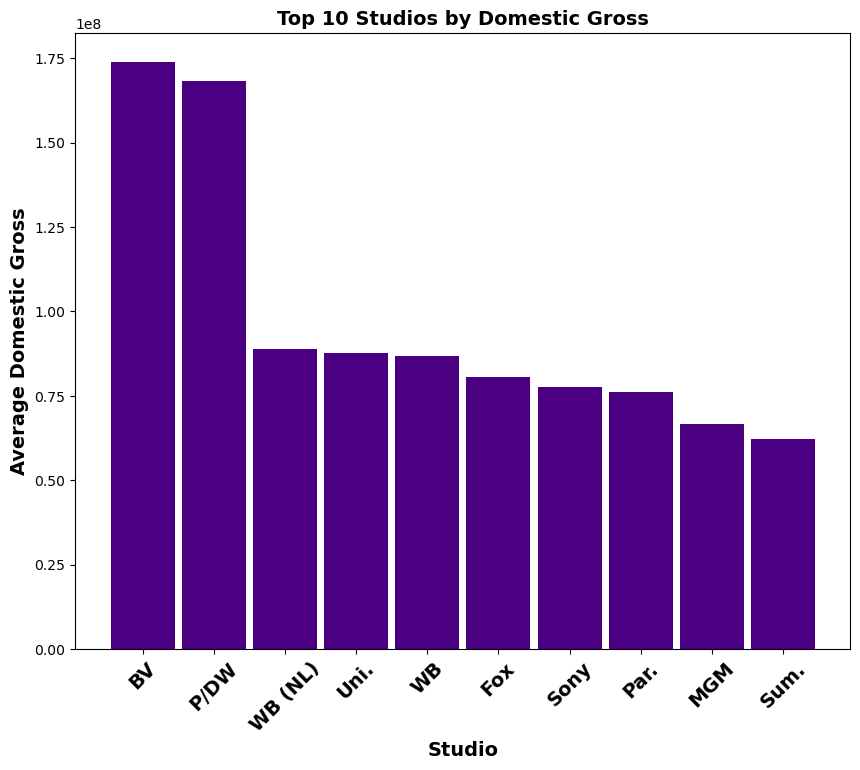

In [ ]:
# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios.index, top_studios.values, color="indigo", width= 0.9)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.xlabel("Studio", fontsize=14, fontweight='bold')
plt.ylabel("Average Domestic Gross", fontsize=14, fontweight='bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=14, fontweight='bold')
plt.gcf().set_size_inches(10, 8)
plt.show()

From the graph above it is evident that BV is the most preffered studio to invest in movie production by Microsoft. This is because, it recorded the highest domestic gross unlike other movies. Besides the other studios also recorded good fair returns in domestic gross and can serve as an alternative for Microsft when choosing a studio to produce the videos.

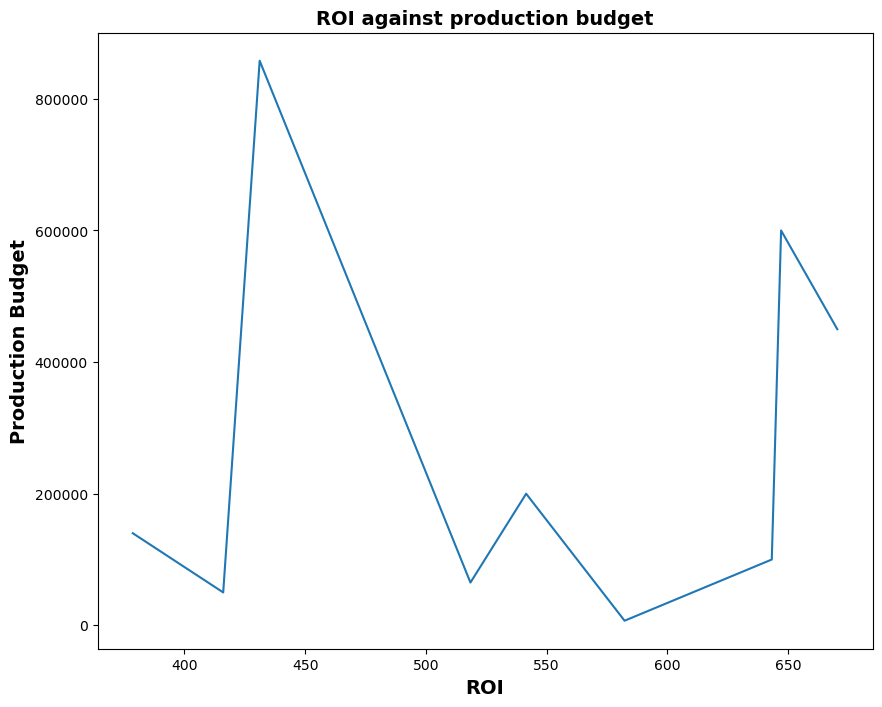

In [ ]:
#ploting the line graph of ROI against the production budget
x = movie_df_sorted['ROI'] 
y = movie_df_sorted['production_budget']
plt.plot(x,y,)
plt.ylabel("Production Budget", fontsize=14, fontweight='bold')
plt.title("ROI against production budget", fontsize=14, fontweight='bold')
plt.xlabel("ROI", fontsize=14, fontweight='bold')
plt.gcf().set_size_inches(10, 8)
plt.show()

As seen from the graph above, there is no linear correlation between production budget and domestic income. This shows that a movie can be produced with alot of money and endup making lesser profits. Therefore other factors also should be taken into consideration  when determining the returns. 

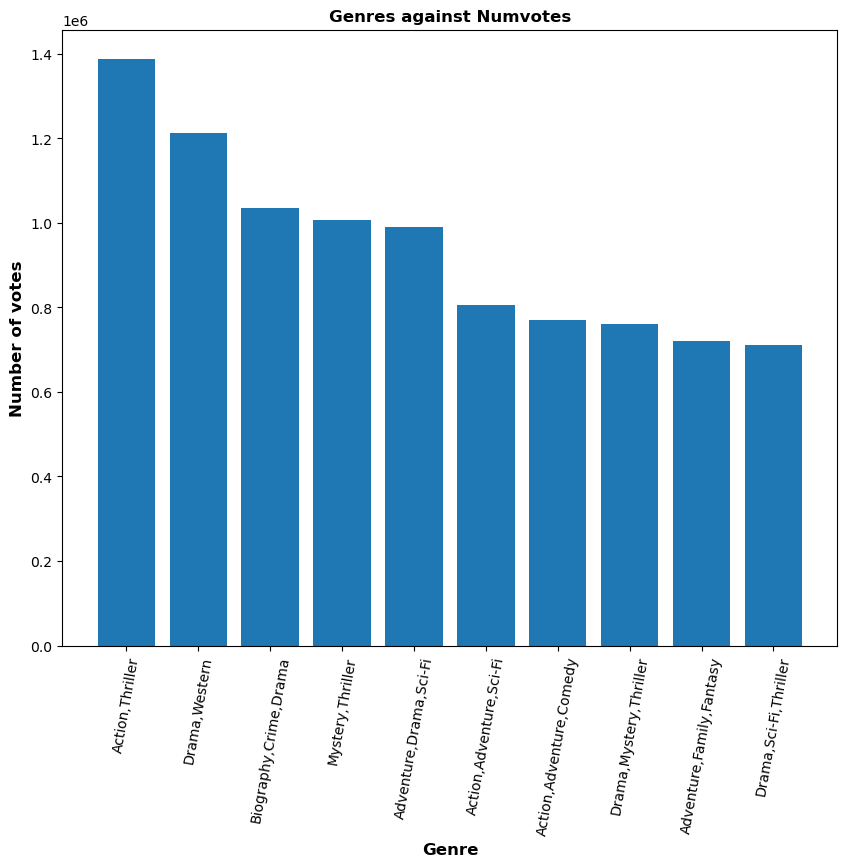

In [ ]:
#plotting genres against numvotes
plt.figure(figsize=(10, 8))
plt.xticks(rotation=80, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.ylabel("Number of votes", fontsize=12, fontweight='bold')
plt.title("Genres against Numvotes", fontsize=12, fontweight='bold')
plt.xlabel("Genre", fontsize=12, fontweight='bold')
plt.bar(y.index, y.values);

The chart above depicts the number of people who voted for several genre collections. As seen from the visual above the most preffered genre was action and thriller followed by collection of drama and western and other respectively. The graph shows top ten prefffered collection of genres which gives the microsoft better insights in terms of genre of movies to invest in.

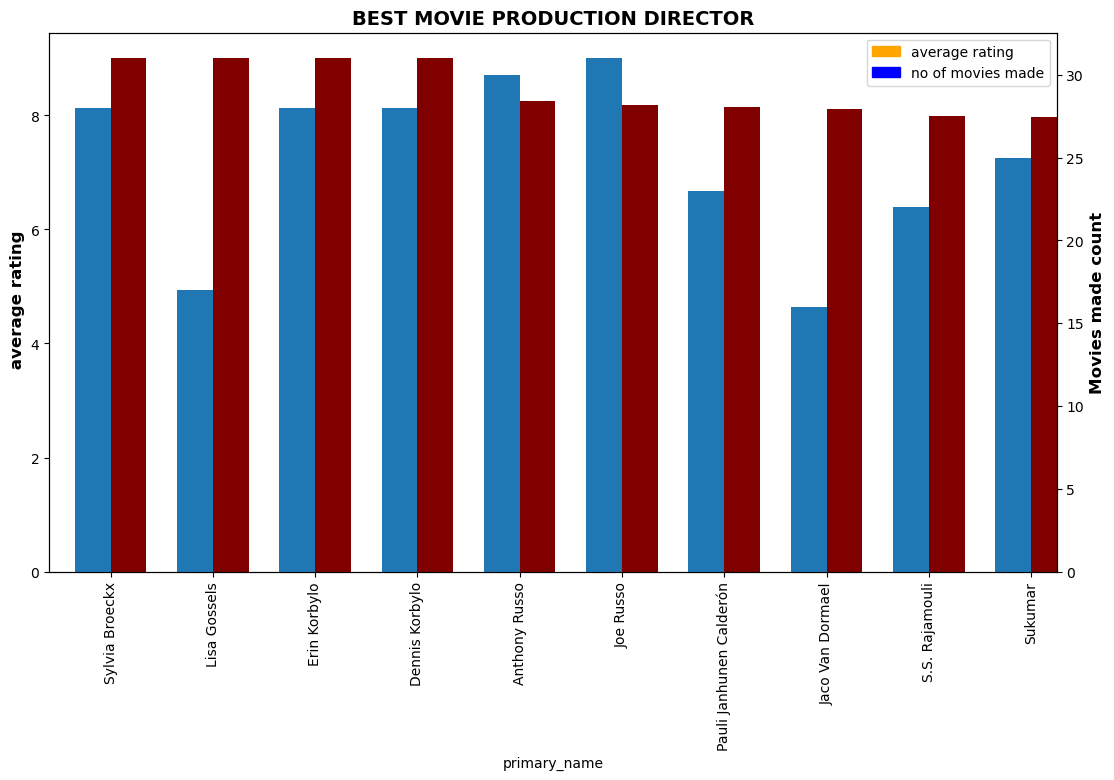

In [13]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = .35

popular = directors_ratings_and_names.set_index('primary_name')



popular['AVG(averagerating)'].plot(kind='bar',color='maroon',ax=ax,width=width, position=0, label = 'average rating')
popular['COUNT(primary_name)'].plot(kind='bar', ax=ax2,width = width,position=1, label = 'no of movies made')

ax.set_title('BEST MOVIE PRODUCTION DIRECTOR', fontweight='bold', fontsize = 14)
ax.set_ylabel(' average rating', fontweight='bold',fontsize = 12)
ax2.set_ylabel('Movies made count', fontweight='bold',fontsize = 12)

# Add the legend
green_patch = mpatches.Patch(color='orange', label='average rating')
blue_patch = mpatches.Patch(color='blue', label='no of movies made')
plt.legend(handles=[green_patch, blue_patch]);

 The chart above shows top performing directors in terms of average ratings. Directors shown above are the ones with ratings of above 7.5 as per average rates. Besides the directors number of movies produced is also shown. Microsoft should consider employing or seeking for advice from directors with higher ratings sice their work is quality. Sylvia Broeckx, Dennis Korbylo and Erin Korbylo are among top perfoming directors with highest movie production hence more recommended for Microsoft studio. 

## Recommendation


This analysis leads to recomendations for Microsoft to utilise in the implemenation of their new movie studio:
* Since action and thriller followed by collection of drama and western were voted by most people and had highest number of ratings it can be seen that they are most preffered for microsft production. 
* Also these two studios also are recommendable since they provided higher returns.
* Sylvia Broeckx, Dennis Korbylo and Erin Korbylo are among top perfoming directors with highest movie production hence more recommended for Microsoft studio. 
* Besides BV and P/WD are studios that are recommendable due to their prefferences as seen from its average domestic gross profits

## Next Step
There might be other factors that affect movie industries that are not taken into considertaion. For example there is no linear correlation between production budget and gross income. 
Hence collecting more data in larger frame will help in reducing biasness and giving more accurate insights. 
Also there is need of making prediction about movie industry in future rather than relying alone in old dataset for invetsments. 